In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [18]:
plt.style.use('ggplot')

## Colesky Metoden

https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119476771.app3

$\gamma(k) = \mathbb{E} [X_1X_{k+1}] = \frac{1}{2} \left( \left(k+1 \right)^{2H} + |k-1|^{2H} - 2k^{2H} \right), k\geq 0$

$l^2_{22} = \gamma (0) = 1$

$l_{21} l_{11} = \gamma (1), l^2_{21} + l^2_{22} = 1$

$l_{n+1,1} = \gamma(n)$

$l_{n+1,j} = l^{-1}_{jj} \left( \gamma(n+1-j) - \sum_{k=1}^{j-1} l_{n+1,k} l_{jk} \right), 2 \leq j \leq n$

$l_{n+1,n+1} = \sqrt{1- \sum_{k=1}^n l^2_{n+1,k} }$

In [109]:
def cholesky(T, N, H):
    '''
    args:
        T:      Tid i år
        N:      Steps
        H:      Hurst
    '''
    gamma = lambda k,H: 0.5*((k+1)**(2*H) + np.abs(k-1)**(2*H) - 2*k**(2*H))  
    
    L = np.zeros((N,N))
    X = np.zeros(N)
    Z = np.random.standard_normal(size=N)

    L[0,0] = 1.0
    
    L[1,0] = gamma(1,H)
    L[1,1] = np.sqrt(1 - (L[1,0]**2))
    
    for i in range(2,N):
        L[i,0] = gamma(i,H)
        
        for j in range(1, i):         
            L[i,j] = (1/L[j,j])*(gamma(i-j,H) - (L[i,0:j] @ L[j,0:j]))

        L[i,i] = np.sqrt(1 - np.sum((L[i,0:i]**2))) 
    
    X = np.matmul(L, Z)
    
    fBm = np.cumsum(X)*(N**(-H))
    return (T**H)*(fBm)

In [110]:
%timeit cholesky(1,720,0.1)

1.84 s ± 47.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [95]:
%timeit cholesky(1,360,0.1)

489 ms ± 22.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
%timeit cholesky(1,360,0.5)

455 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [114]:
h = ['0.1','0.5','0.8']

sim = []

for i in h:
    x = cholesky(1,720,float(i))
    sim.append(x)

sim = pd.DataFrame(np.transpose(sim), columns=h)

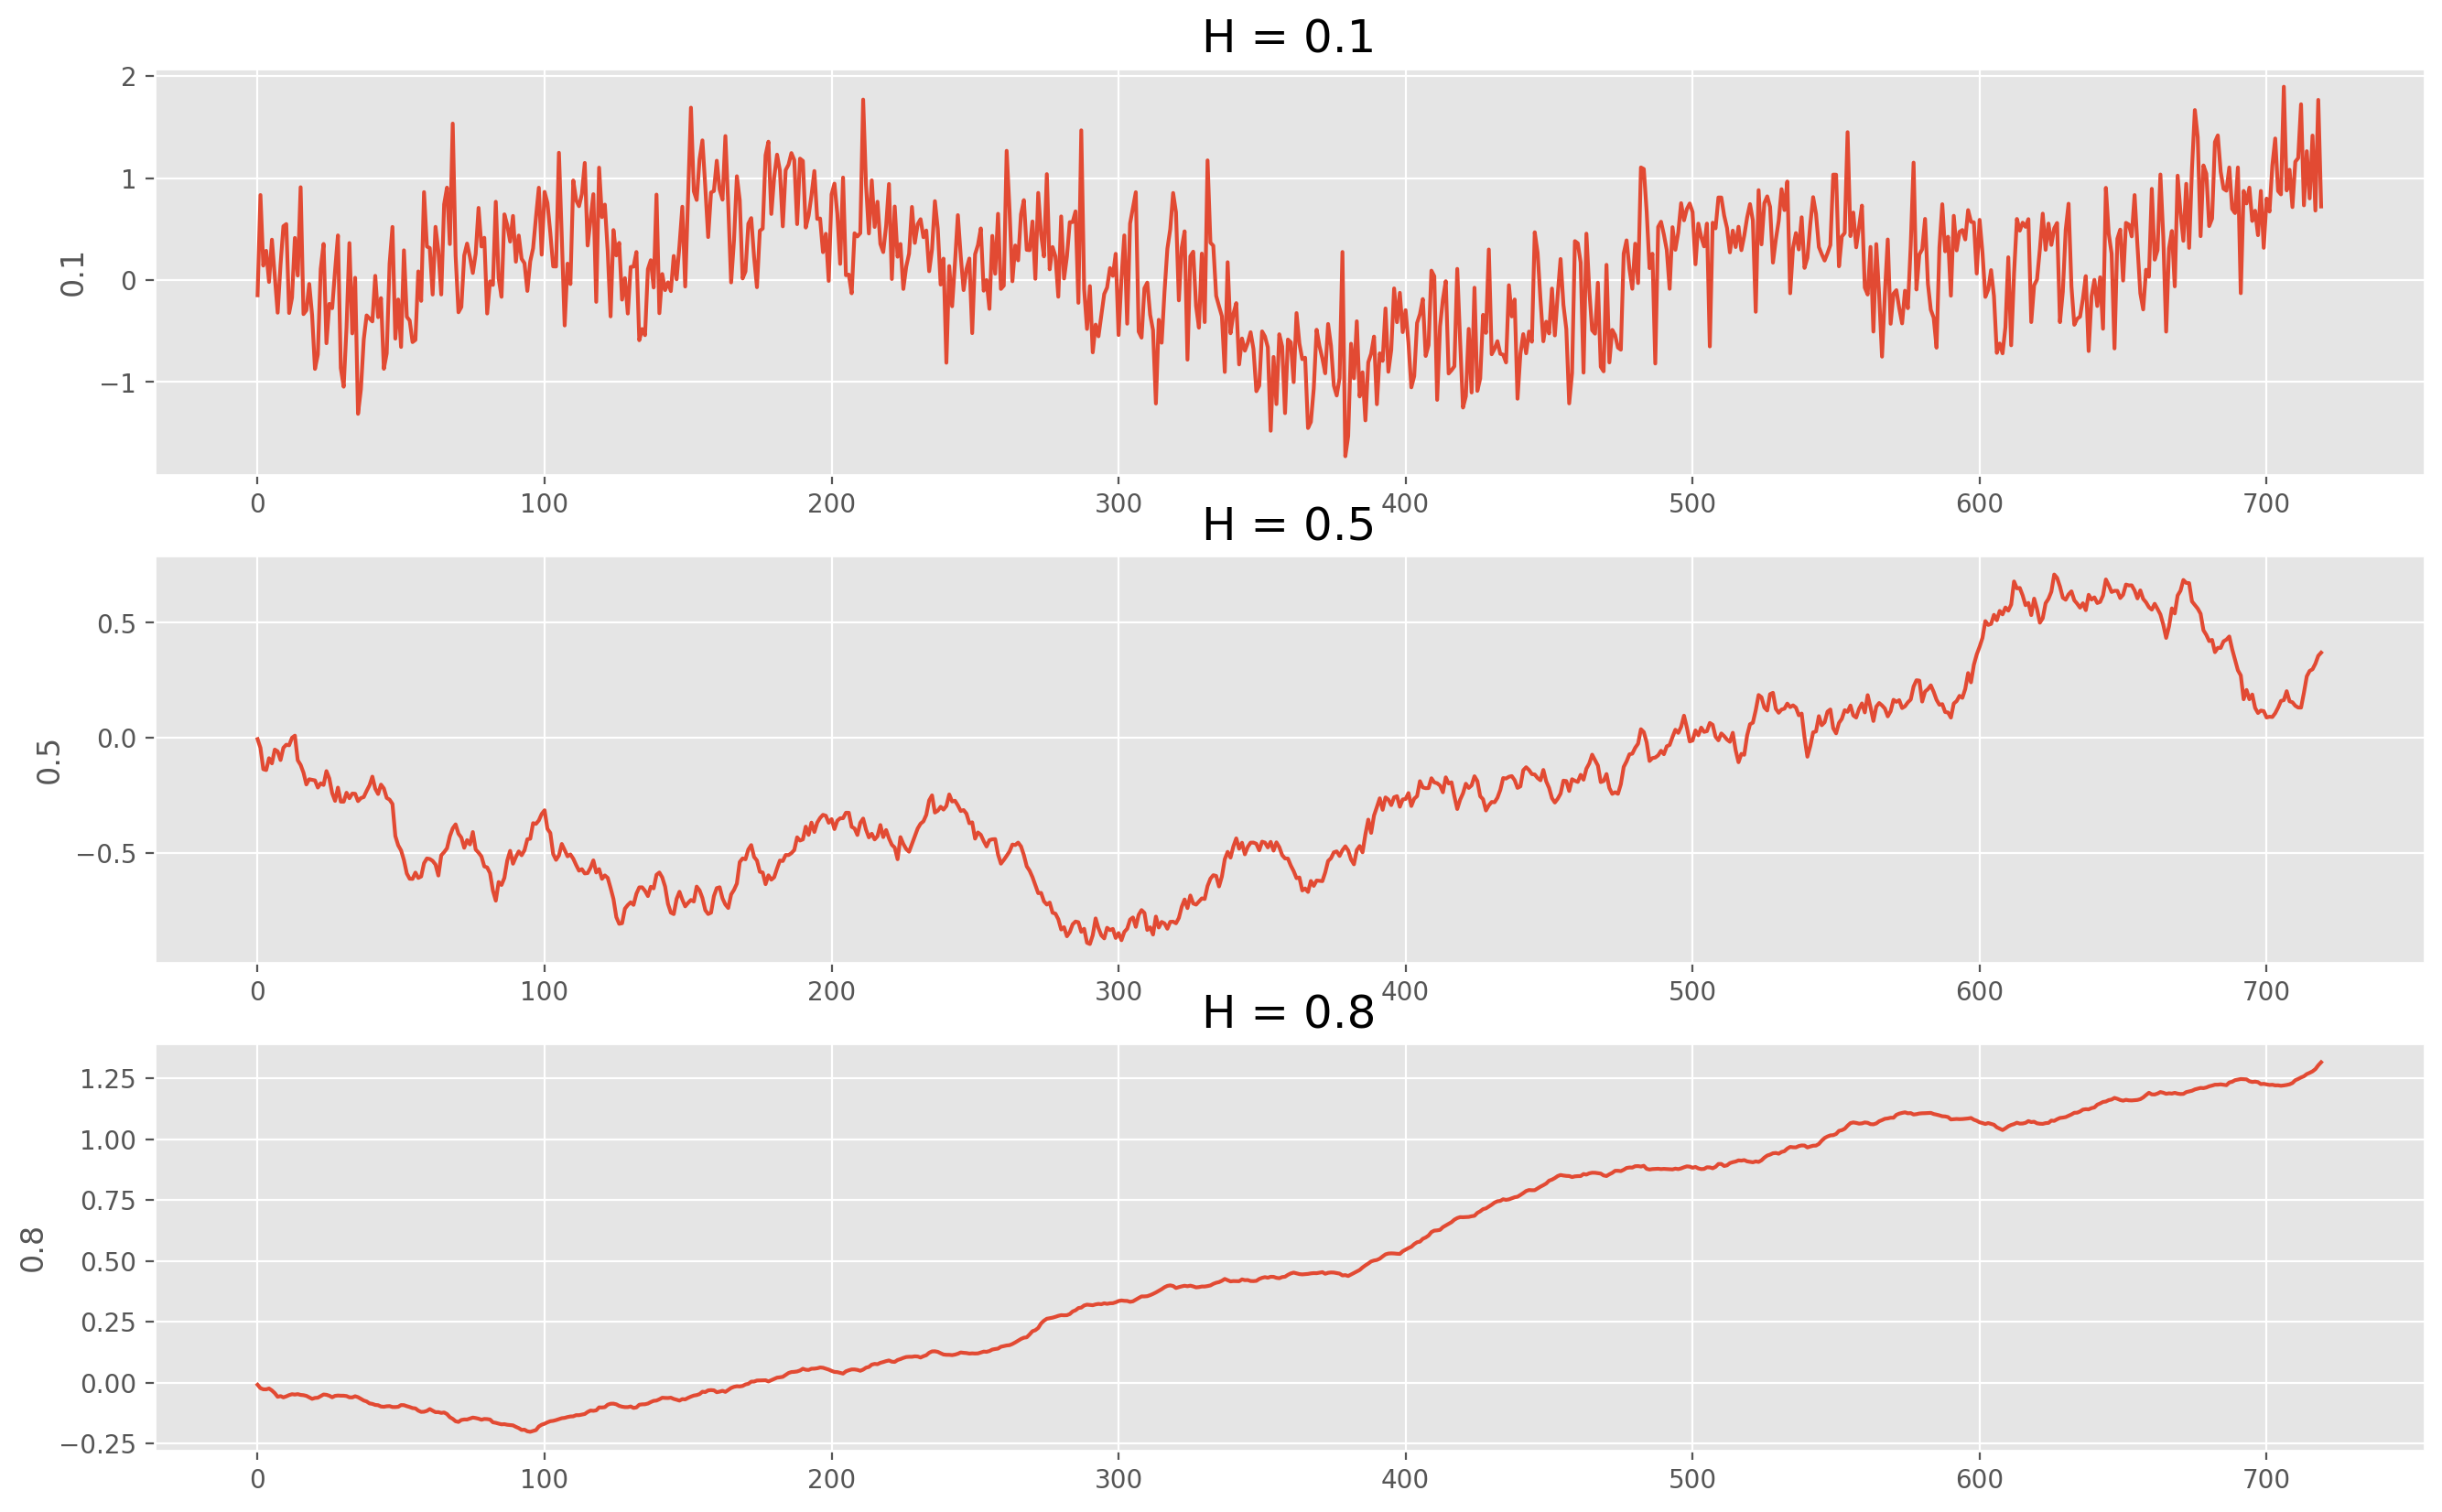

In [115]:
fig, ax = plt.subplots(3,1, figsize = (16,10), dpi=200)

for i in range(len(h)):
    sns.lineplot(data = sim, x = sim.index, y = h[i], ax = ax[i])
    ax[i].set_title('H = {}'.format(h[i]), fontsize=18)

plt.show()

## Hosking Metoden